# The Problem

Differential abundance is a technique designed to determine what species are changing between treatments.
Suppose that you have two cohorts, a diseased cohort and a healthy cohort.  And you have sampled fecal matter from both cohorts and you want to isolate which bacterial strains have statistically different abundances between sick and healthy cohorts.  

Although this seems simple at a first glance, the problem turns out to be quite difficult, mainly due to two properties of the data

1. Compositional properties
2. Sparsity - due to ecological / biological processes

Let's first begin with the urn analogy.  Let a urn below represent the environment that you would like to sample.

<img src="images/urn.jpg">

Now, your urn has a bunch of balls with different color.  Each ball represents the data type you would like to analyze.  For now, let's refer to each ball being a bacterial individual, and a color representing a species.
When you are sampling from the urn, you cannot sample the entire urn.  You can only draw a few balls from the urn.  

Because of this, you do not know the total number of balls in the urn, and you only get a representative sample of the urn.  Since you do not know the total number of balls in the urn, the only inferences that can be make on the data are on the proportions of bacterial species.  This ultimately limits the types of inferences that can be made on the environment.  This is the major problem with compositional data.

To better understand this problem, consider the following scenario.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

You are collecting two samples, one sample at time point 1 and another sample at time point 2.

And you notice the following pattern

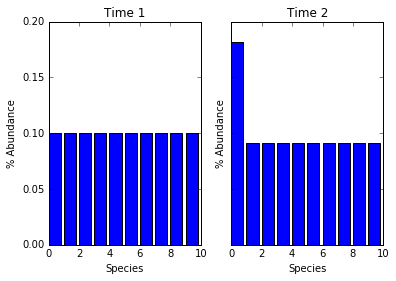

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
x1 = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
x2 = np.array([0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
x2 = x2/x2.sum()
ax1.bar(range(10), x1)
ax2.bar(range(10), x2)

ax1.set_title('Time 1')
ax2.set_title('Time 2')

ax1.set_xlabel('Species')
ax2.set_xlabel('Species')

ax1.set_ylabel('% Abundance')
ax2.set_ylabel('% Abundance')

At first, you may be inclined to say that Species 1 increased drastically.  And that the following scenario is possible.

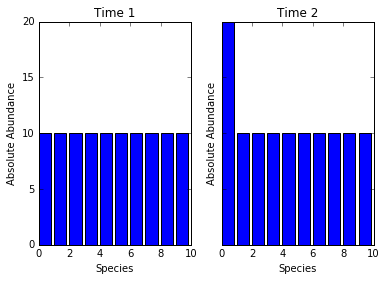

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
x1 = np.array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])
x2 = np.array([20] + [10, 10, 10, 10, 10, 10, 10, 10, 10])
ax1.bar(range(10), x1)
ax2.bar(range(10), x2)

ax1.set_title('Time 1')
ax2.set_title('Time 2')

ax1.set_xlabel('Species')
ax2.set_xlabel('Species')

ax1.set_ylabel('Absolute Abundance')
ax2.set_ylabel('Absolute Abundance')

Note the `Absolute Abundance` label on the y axis.  This is really important, because the following plots could generate the exact same proportions.  

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
x1 = np.array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100])
x2 = np.array([200, 10, 10, 10, 10, 10, 10, 10, 10, 10])
ax1.bar(range(10), x1)
ax2.bar(range(10), x2)

ax1.set_title('Time 1')
ax2.set_title('Time 2')

ax1.set_xlabel('Species')
ax2.set_xlabel('Species')

ax1.set_ylabel('Absolute Abundance')
ax2.set_ylabel('Absolute Abundance')

This concept is commonly referred to as __compositional equivalence__.  More formally, two compositions $x$, $y$ are equivalent if the following holds

$$y = c x$$

where $c$ can be any positive constant.  This is the case, because $x$ and $y$ have the exact same proportions when they are normalized to add to 1.


Now, consider the following scenario.

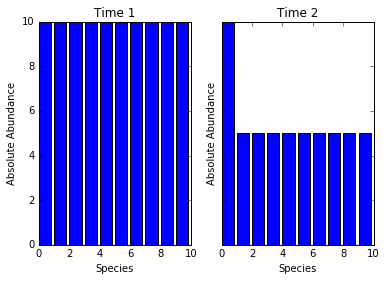

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
x1 = np.array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10]) 
x2 = np.array([10] + [5, 5, 5, 5, 5, 5, 5, 5, 5])
ax1.bar(range(10), x1)
ax2.bar(range(10), x2)

ax1.set_title('Time 1')
ax2.set_title('Time 2')

ax1.set_xlabel('Species')
ax2.set_xlabel('Species')

ax1.set_ylabel('Absolute Abundance')
ax2.set_ylabel('Absolute Abundance')

Here, Species 1 did not grow.  Species 1 is exactly the same between the 2 time points, but Species 2-10 all halved.  Its a completely different set of circumstances, but it produced the exact same proportions.

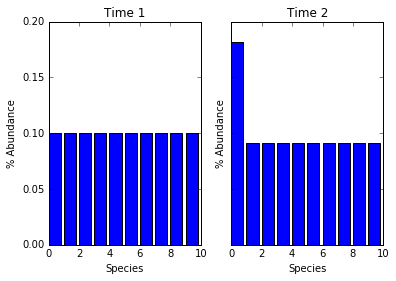

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
x1 = np.array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10]) 
x2 = np.array([10] + [5, 5, 5, 5, 5, 5, 5, 5, 5])
x1 = x1/x1.sum()
x2 = x2/x2.sum()
ax1.bar(range(10), x1)
ax2.bar(range(10), x2)

ax1.set_title('Time 1')
ax2.set_title('Time 2')

ax1.set_xlabel('Species')
ax2.set_xlabel('Species')

ax1.set_ylabel('% Abundance')
ax2.set_ylabel('% Abundance')

Still not convinced? Here is another scenario that produces the exact proportions.

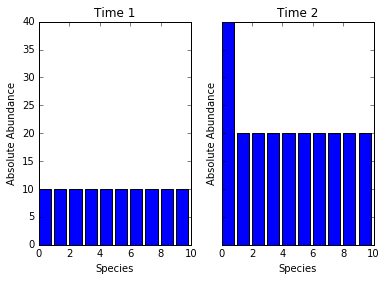

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
x1 = np.array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10]) 
x2 = np.array([40] + [20, 20, 20, 20, 20, 20, 20, 20, 20, 20])
ax1.bar(range(10), x1)
ax2.bar(range(10), x2)

ax1.set_title('Time 1')
ax2.set_title('Time 2')

ax1.set_xlabel('Species')
ax2.set_xlabel('Species')

ax1.set_ylabel('Absolute Abundance')
ax2.set_ylabel('Absolute Abundance')

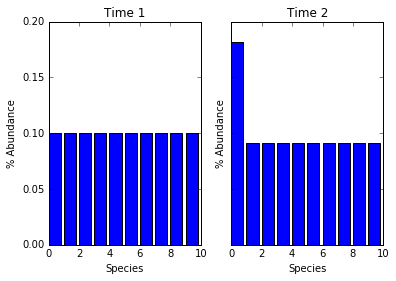

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
x1 = np.array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10) 
x2 = np.array([40, 20, 20, 20, 20, 20, 20, 20, 20, 20])
x1 = x1/x1.sum()
x2 = x2/x2.sum()
ax1.bar(range(10), x1)
ax2.bar(range(10), x2)

ax1.set_title('Time 1')
ax2.set_title('Time 2')

ax1.set_xlabel('Species')
ax2.set_xlabel('Species')

ax1.set_ylabel('% Abundance')
ax2.set_ylabel('% Abundance')

Beginning to see the pattern?

Turns out, there is an infinite number of pairs of environments that give the exact same proportions.
Because of this it is impossible to infer the following

1. What species grew and declined
2. What species changed.

The proof for the first point has been outlined by the examples given above.  The second point is a bit more subtle, so we'll provide a more rigorous proof in the next document `differential_abundance_proof.ipynb`
